In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [4]:
data_path = "CC GENERAL.csv"
data = pd.read_csv(data_path)
print(data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [5]:
# Handling missing values (if any)
data.fillna(data.mode(), inplace=True)
data.fillna(data["CREDIT_LIMIT"].mode()[0], inplace=True)


# Selecting relevant features for clustering
features = data[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS',
       ]]
features.dropna()

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(np.isnan(scaled_features).sum())
print(np.isinf(scaled_features).sum())

0
0


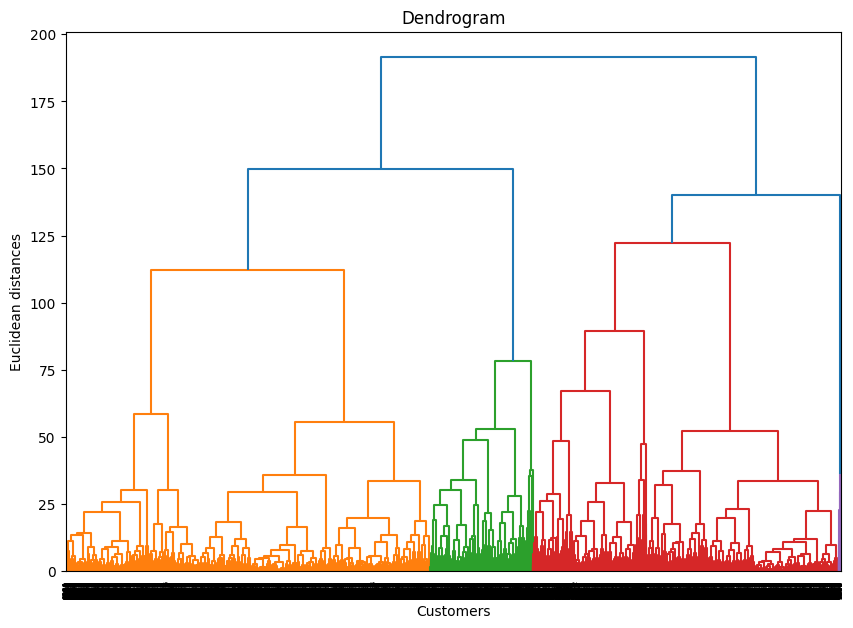

In [6]:
# Compute the linkage matrix
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [7]:
# Fit the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_clustering.fit(scaled_features)

# Adding the cluster labels to the original dataset
data['Cluster'] = agg_clustering.labels_

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


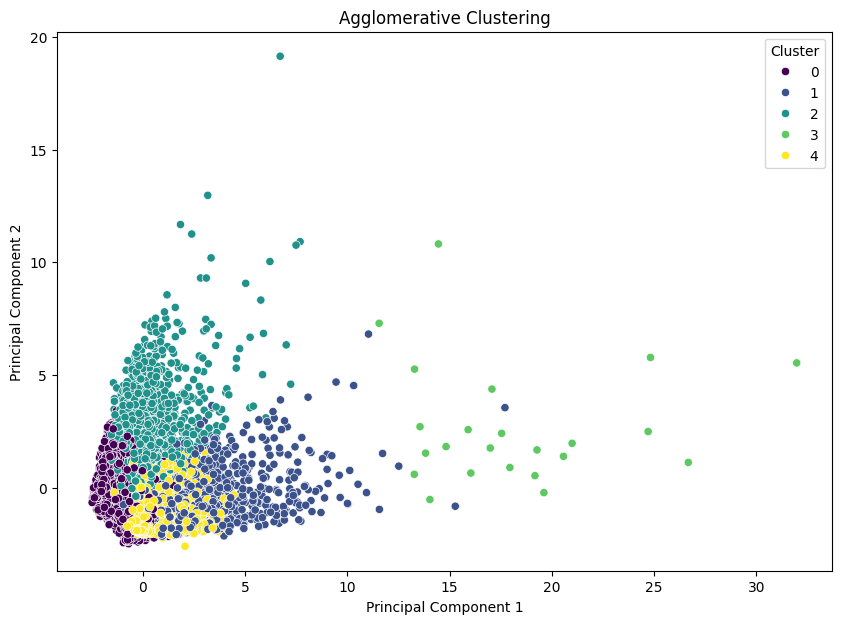

In [8]:
# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [9]:
# Compute the cluster centers (only for numeric columns)
numeric_cols = features.columns
cluster_centers = data.groupby('Cluster')[numeric_cols].mean()

# Display the cluster centers
print(cluster_centers)

             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                   
0         951.148163           0.776035    268.678913        163.815366   
1        1837.774768           0.973742   3216.227288       2282.329511   
2        4420.642815           0.938751    503.625794        342.074552   
3        4812.382778           0.956126  27505.339565      22417.452174   
4        1010.549314           0.978763   1083.731058        316.893407   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    105.202602    542.948097             0.211207   
1                    934.393575    356.782203             0.885588   
2                    161.626368   4484.913975             0.288849   
3                   5087.887391   1617.786145             0.905072   
4                    767.071935    296.860460         

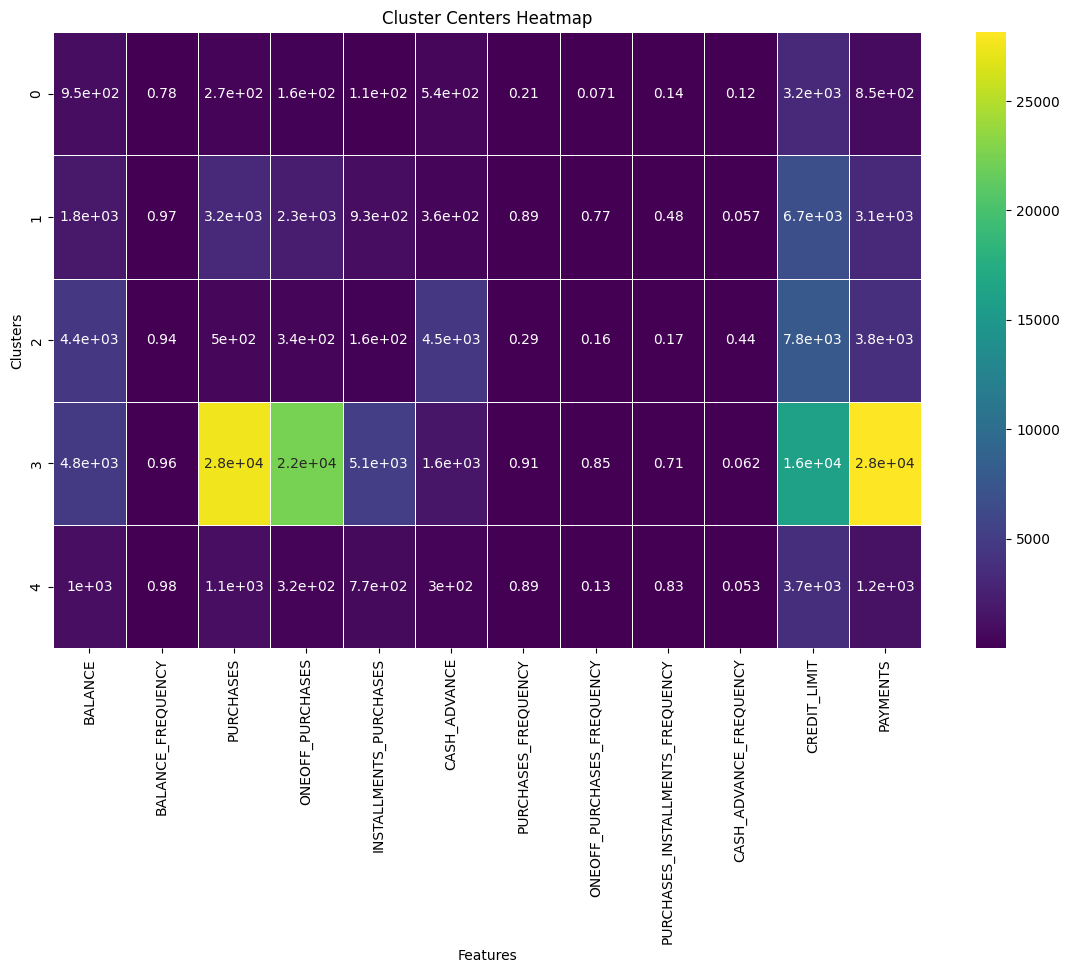

In [10]:
# Set the plot size
plt.figure(figsize=(14, 8))

# Create a heatmap for the cluster centers
sns.heatmap(cluster_centers, annot=True, cmap="viridis", linewidths=.5)
plt.title('Cluster Centers Heatmap')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='binary')  # or 'macro', 'micro', 'weighted'

print(f'F1 Score: {f1}')


F1 Score: 0.9019607843137255
